Neccessary library import

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps, romberg

## Section 1) 
Potential contourplot and numerical integration

In [69]:
# Define the boundary condition functions V0(xi)
V0 = lambda x: 1 - (x - 1/2)**4
V0_2 = lambda x: np.exp(-x)
V0_3 = lambda x: np.heaviside(x - 1/2, 1) * np.heaviside(3/4 - x, 1)
V0_4 = lambda x: np.heaviside(x - 1/2, 1)* np.sinc(x**2)

# Define the domain
x = np.linspace(0, 1, 500)  # xi values from 0 to 1
X, Y = np.meshgrid(x, x)  # Using same points for Y for plotting

# Compute the nth Fourier coefficient using Simpson's rule
def cn(V0, n, L=1):
    """
    V0: boundary conditions
    n: n-th coefficient to calculate
    L: Period
    """
    A = (2 / L) / np.sinh(n * np.pi)  # Prefactor in front of integral, L included for generality
    Y = V0(X) * np.sin(n * np.pi * X / L)  # Function values at the sample points
    return A * simps(Y, X)

def cn_romberg(V0, n, L=1):
    """
    V0: boundary conditions
    n: n-th coefficient to calculate
    L: Period
    """
    def integrand(x):
        return V0(x) * np.sin(n * np.pi * x / L)
    
    A = (2 / L) / np.sinh(n * np.pi)  # Prefactor
    result = romberg(integrand, 0, L, divmax=15) 
    return A * result

def cn_trapezoidal(V0, n, L=1):
    """
    V0: boundary conditions
    n: n-th coefficient to calculate
    L: Period
    """
    A = (2 / L) / np.sinh(n * np.pi)  # Prefactor
    Y = V0(X) * np.sin(n * np.pi * X / L)  # Function values at the sample points
    return A * np.trapz(Y, X)

# Function to calculate the potential for a given V0
def calculate_potential(V0, N, method=""):
    """
    V0: boundary condition
    n: n-th coefficient to calculate
    Method: integration method
    """
    V = np.zeros_like(X)

    #Sum up all coefficients and all grid points into one gradient
    for n in range(1, N+1):
        if method=="simp":
            Cn = cn(V0, n)  
        elif method=="rom":
            Cn = cn_romberg(V0,n)
        elif method=="trap":
            Cn = cn_trapezoidal(V0,n)
        else:
            Cn = cn(V0,n)
        V += Cn * np.cosh(n * np.pi * Y) * np.sin(n * np.pi * X)  # Add the term to the potential
    return V

N = 100 # Number of Fourier coefficients 

# Calculate the potential for each V0 boundary condition
V1 = calculate_potential(V0, N) 
V2 = calculate_potential(V0_2, N)
V3 = calculate_potential(V0_3, N)
V4 = calculate_potential(V0_4, N)

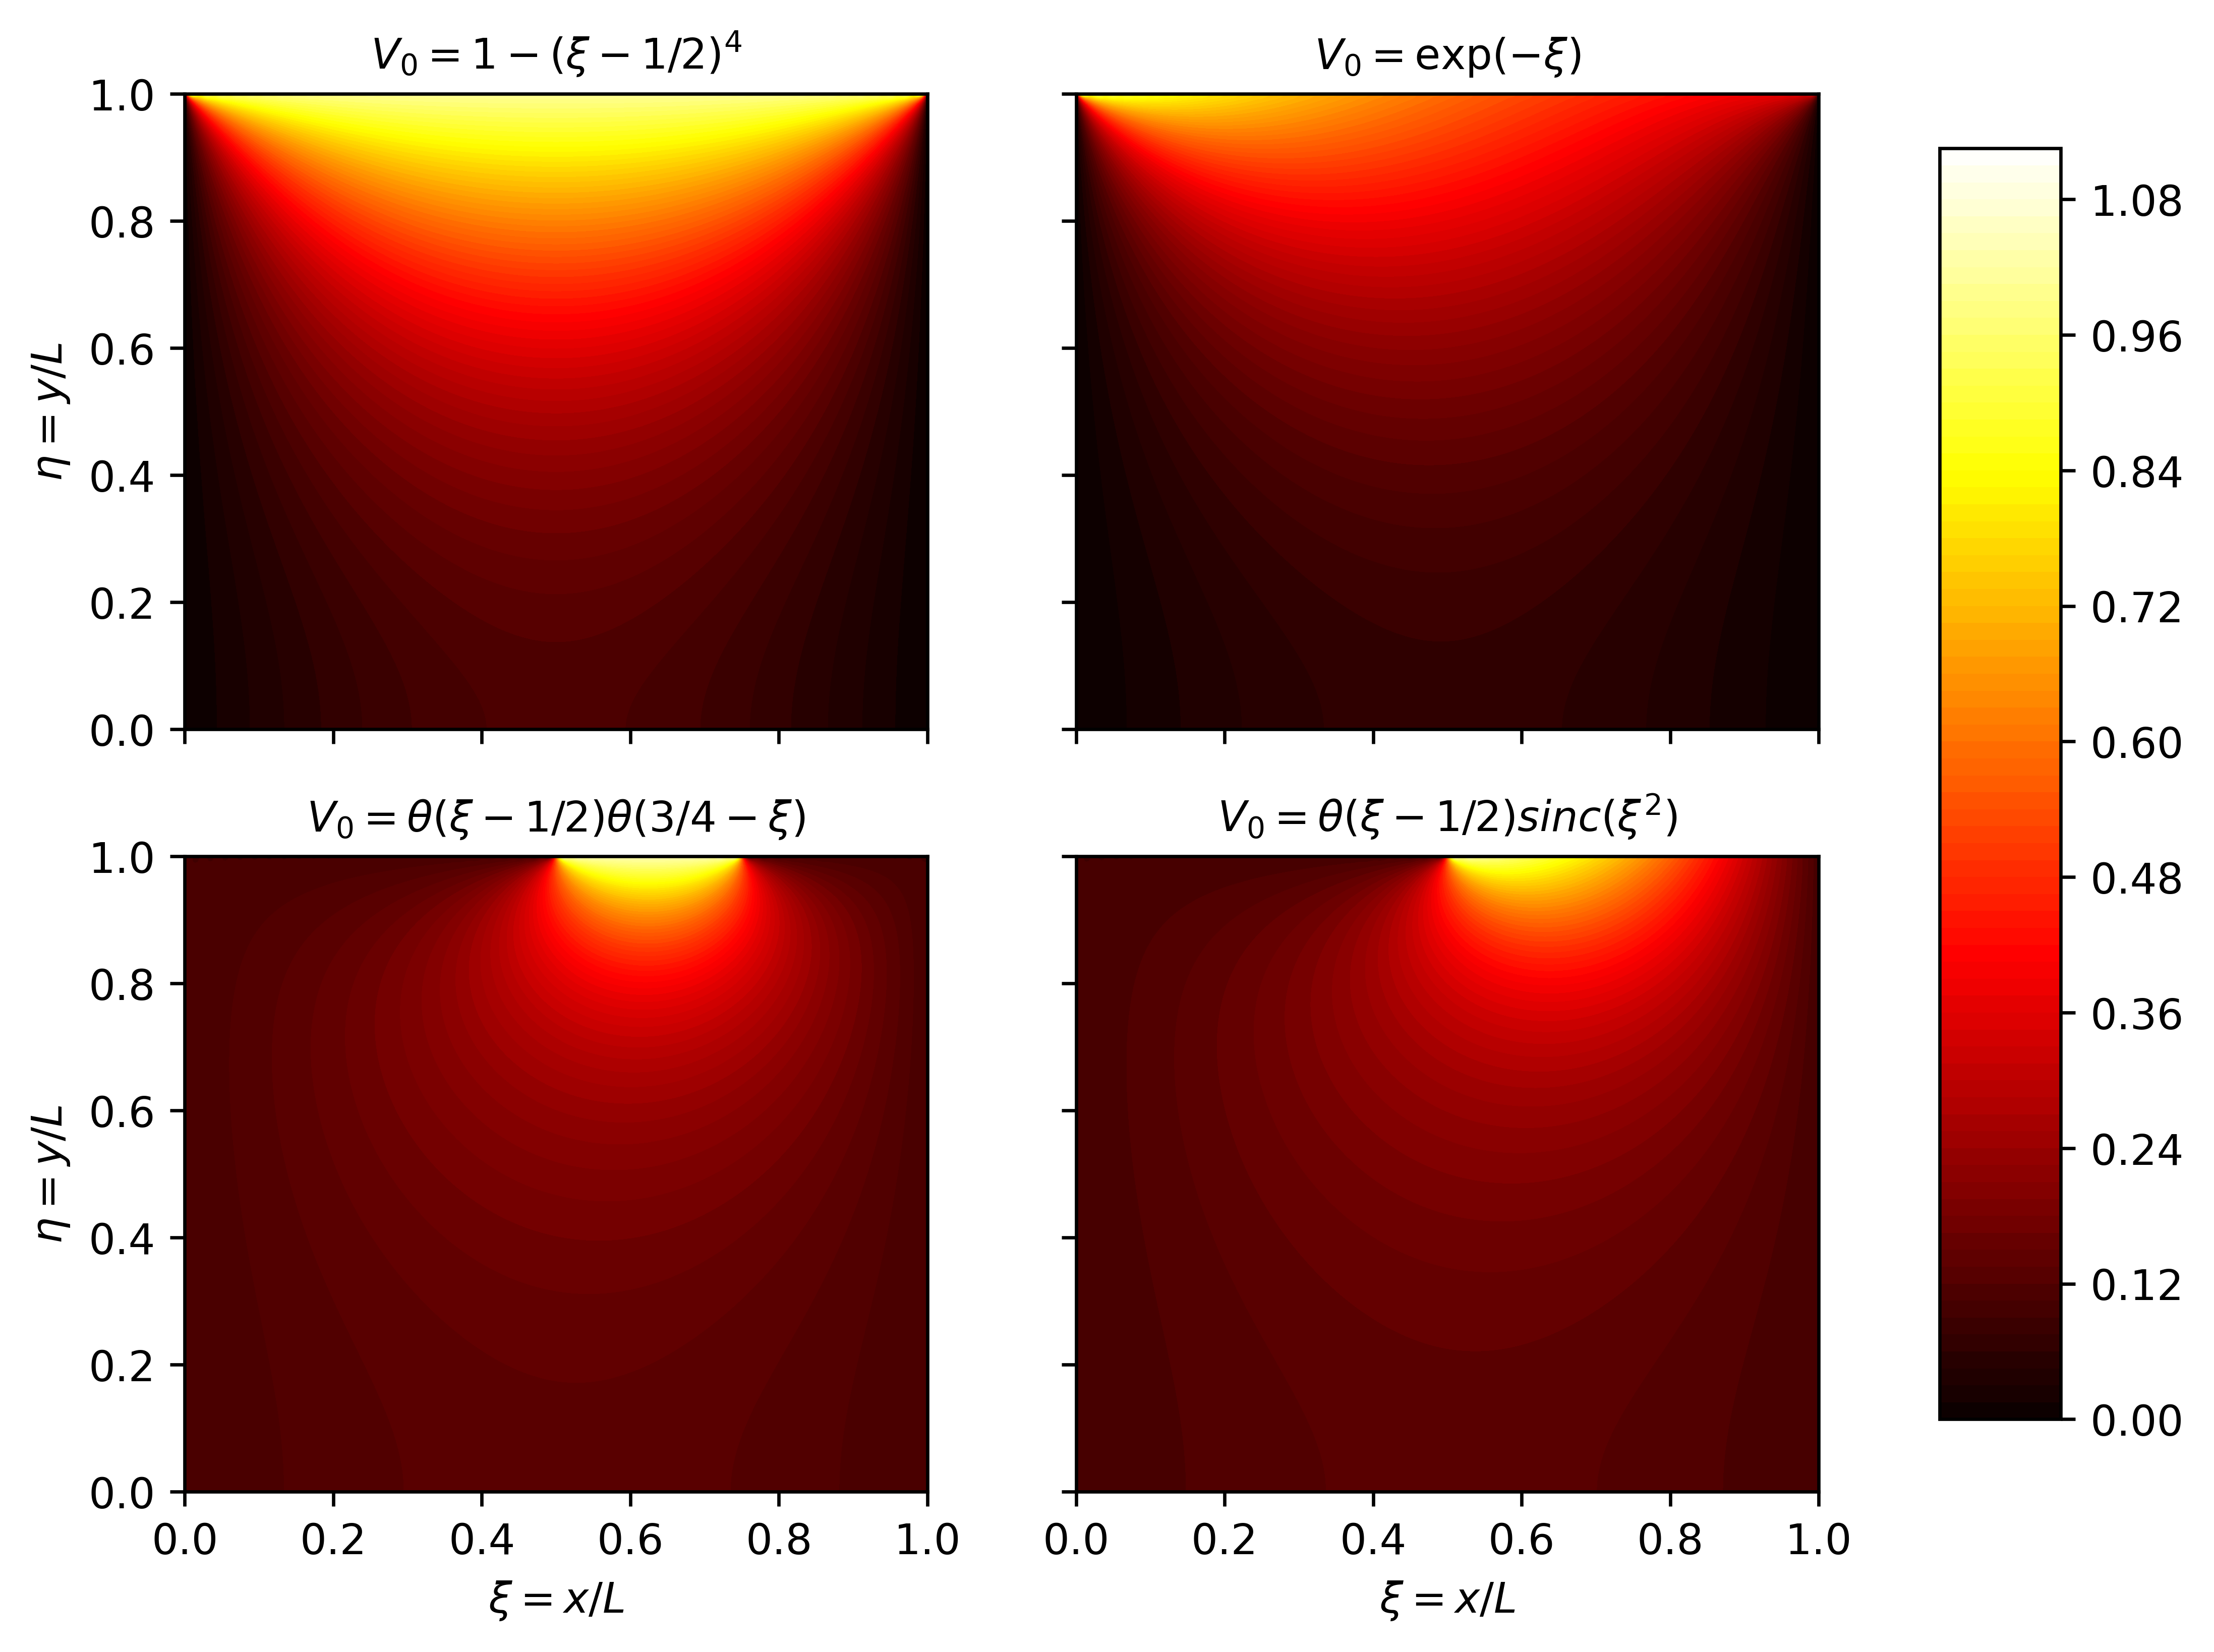

In [70]:
import matplotlib.pyplot as plt
import numpy as np

#Plotting in 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=600, sharex='col', sharey='row')

c1 = axes[0, 0].contourf(X, Y, V1, 100, cmap='hot')
axes[0, 0].set_title(r'$V_{0} = 1-(\xi-1/2)^4$', size=10)
axes[0, 0].set_ylabel(r'$\eta=y/L$')

c2 = axes[0, 1].contourf(X, Y, V2, 100, cmap='hot')
axes[0, 1].set_title(r'$V_{0} = \exp(-\xi)$', size=10)

c3 = axes[1, 0].contourf(X, Y, V3, 100, cmap='hot')
axes[1, 0].set_title(r'$V_{0} = \theta(\xi-1/2)\theta(3/4-\xi)$', size=10)
axes[1, 0].set_xlabel(r'$\xi=x/L$')
axes[1, 0].set_ylabel(r'$\eta=y/L$')

c4 = axes[1, 1].contourf(X, Y, V4, 100, cmap='hot')
axes[1, 1].set_title(r'$V_{0} = \theta(\xi-1/2)sinc(\xi^2)$', size=10)
axes[1, 1].set_xlabel(r'$\xi=x/L$')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(c1, cax=cbar_ax)

plt.show()

In [72]:
from scipy.signal import find_peaks
# Find local maxima of z, calculate error
V_num = calculate_potential(V0_3, 200)[-1, 0:len(x)]
peaks, _ = find_peaks(V_num, height=1.08)
print((V_num[peaks][0] - 1) * 100, "% error")

10.370358064689977 % error


## Section 2) 
Gibbs phenomena demonstration

In [6]:
a = int(0.28 * len(x))  # Start index for plot
b = int(2 * len(x))  # End index for plot

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9), dpi=1200)  # Two subplots in one column

ax1.plot(x[a:b], V0_3(x[a:b]), c="black", lw=3, label=r'$V_0(\xi) = \theta(1/2-\xi)\theta(\xi-2/3)$')
ax1.plot(x[a:b], calculate_potential(V0_3, 20)[-1, a:b], label=r'$V_3(\eta = 1), N = 10$')
ax1.plot(x[a:b], calculate_potential(V0_3, 100)[-1, a:b], label=r'$V_3(\eta = 1), N = 100$')
ax1.plot(x[a:b], calculate_potential(V0_3, 200)[-1, a:b], label=r'$V_3(\eta = 1), N = 200$')
ax1.set_xlabel(r'$V(\xi)$')
ax1.set_ylabel(r'$\xi=x/L$')
ax1.grid()
ax1.legend()

ax2.plot(x, V0_4(x), c="black", lw=3, label=r'$V_0(\xi) = \theta(\xi-1/2)sinc(\xi^2)$')
ax2.plot(x, calculate_potential(V0_4, 20)[-1], label=r'$V_3(\eta = 1), N = 20$')
ax2.plot(x, calculate_potential(V0_4, 100)[-1], label=r'$V_3(\eta = 1), N = 100$')
ax2.plot(x, calculate_potential(V0_4, 200)[-1], label=r'$V_3(\eta = 1), N = 200$')
ax2.set_xlabel(r'$V(\xi)$')
ax2.set_ylabel(r'$\xi=x/L$')
ax2.set_title(r'$V_0 = \theta(\xi-1/2)sinc(\xi^2)$')
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()

## Section 3) 
Investigation of convergence time

In [7]:
import time
def timer(f, V0, N):
    start_time = time.perf_counter()
    result = f(V0, N)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    return elapsed_time

N_vals = np.arange(0, 500, 20)
V0_values = [V0, V0_2, V0_3, V0_4]
times = [[] for _ in range(len(V0_values))]

for i, V0_val in enumerate(V0_values):
    times[i] = [timer(calculate_potential, V0_val, n) for n in N_vals]


C:\Users\David\AppData\Local\Temp\ipykernel_15588\3756667998.py:11: RuntimeWarning: overflow encountered in sinh
  A = (2 / L) / np.sinh(n * np.pi)  # Prefactor in front of integral, L included for generality
C:\Users\David\AppData\Local\Temp\ipykernel_15588\3756667998.py:27: RuntimeWarning: overflow encountered in cosh
  V += Cn * np.cosh(n * np.pi * Y) * np.sin(n * np.pi * X)  # Add the term to the potential
C:\Users\David\AppData\Local\Temp\ipykernel_15588\3756667998.py:27: RuntimeWarning: invalid value encountered in multiply
  V += Cn * np.cosh(n * np.pi * Y) * np.sin(n * np.pi * X)  # Add the term to the potential


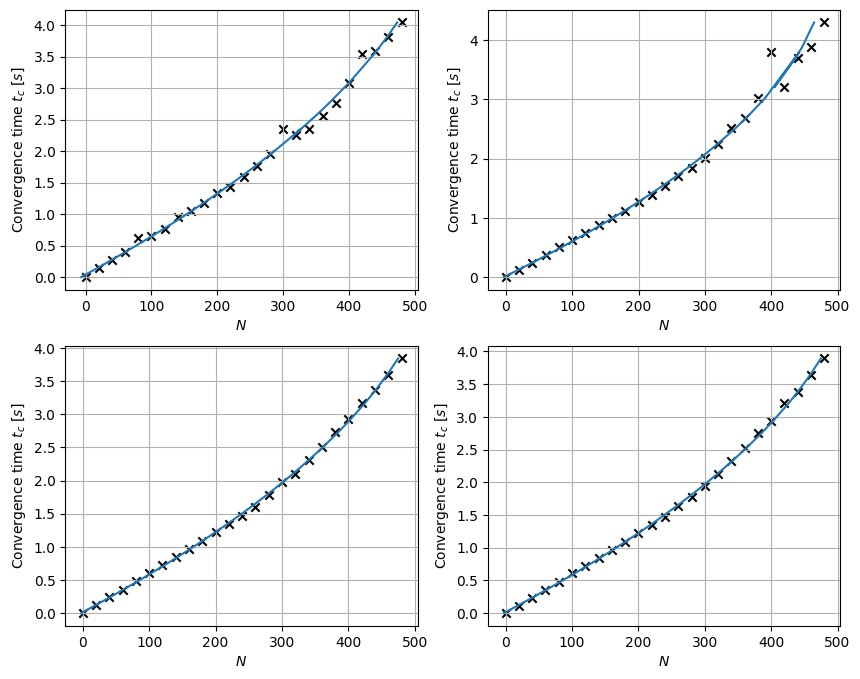

<Figure size 6400x4800 with 0 Axes>

In [21]:
#plt.scatter(times, N_vals, marker="x", color="black", label = r"$t_c(N)$")

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Creates a 2x2 grid of subplots

for i in range(len(times)):
    # Determine the position of the current subplot in the grid
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    # Fit a polynomial
    coefficients = np.polyfit(times[i], N_vals, 2)
    linear_function = np.poly1d(coefficients)

    # Generate y-values for the fitted curve
    fitted_N_vals = linear_function(times[i])

    # Plotting the current times array against N_vals
    ax.scatter(N_vals, times[i], marker='x', linestyle='-', color = "black")
    ax.plot(fitted_N_vals, times[i])
    
    # Labeling axes
    ax.set_xlabel(r'$N$')
    ax.set_ylabel(r'Convergence time $t_c$ $[s]$')
    ax.grid(True)

plt.figure(figsize=(8,6), dpi=800)
# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

## Section 4) 
Investigating numerical precision and accuracy for different methods

In [67]:
test = lambda x: x**2
analytical = lambda n: 2*(2*(-1)**n-2-np.pi**2*((-1)**n)*n**2) / (np.pi**3 * n**3 * np.cosh(np.pi * n))

terms = 100
# Calculate the potential for each V0
simp = 0
trap = 0
rom = 0
sol = 0

for n in range(1, terms+1):
    sol += analytical(n)
    simp += cn(test, n)
    trap += cn_trapezoidal(test, n)
    rom += cn_romberg(test, n)

print("Simpson accuracy: ", np.abs(sol-simp)/sol*100, "% error")
print("Trapezoidal accuracy: ", np.abs(sol-trap)/sol*100, "% error")
print("Romberg accuracy: ", np.abs(sol-rom)/sol*100, "% error")

Simpson accuracy:  0.38790573455224786 % error
Trapezoidal accuracy:  0.38777347636468495 % error
Romberg accuracy:  4.165095162393489 % error


## Section 5) 
Plotting the electric field!

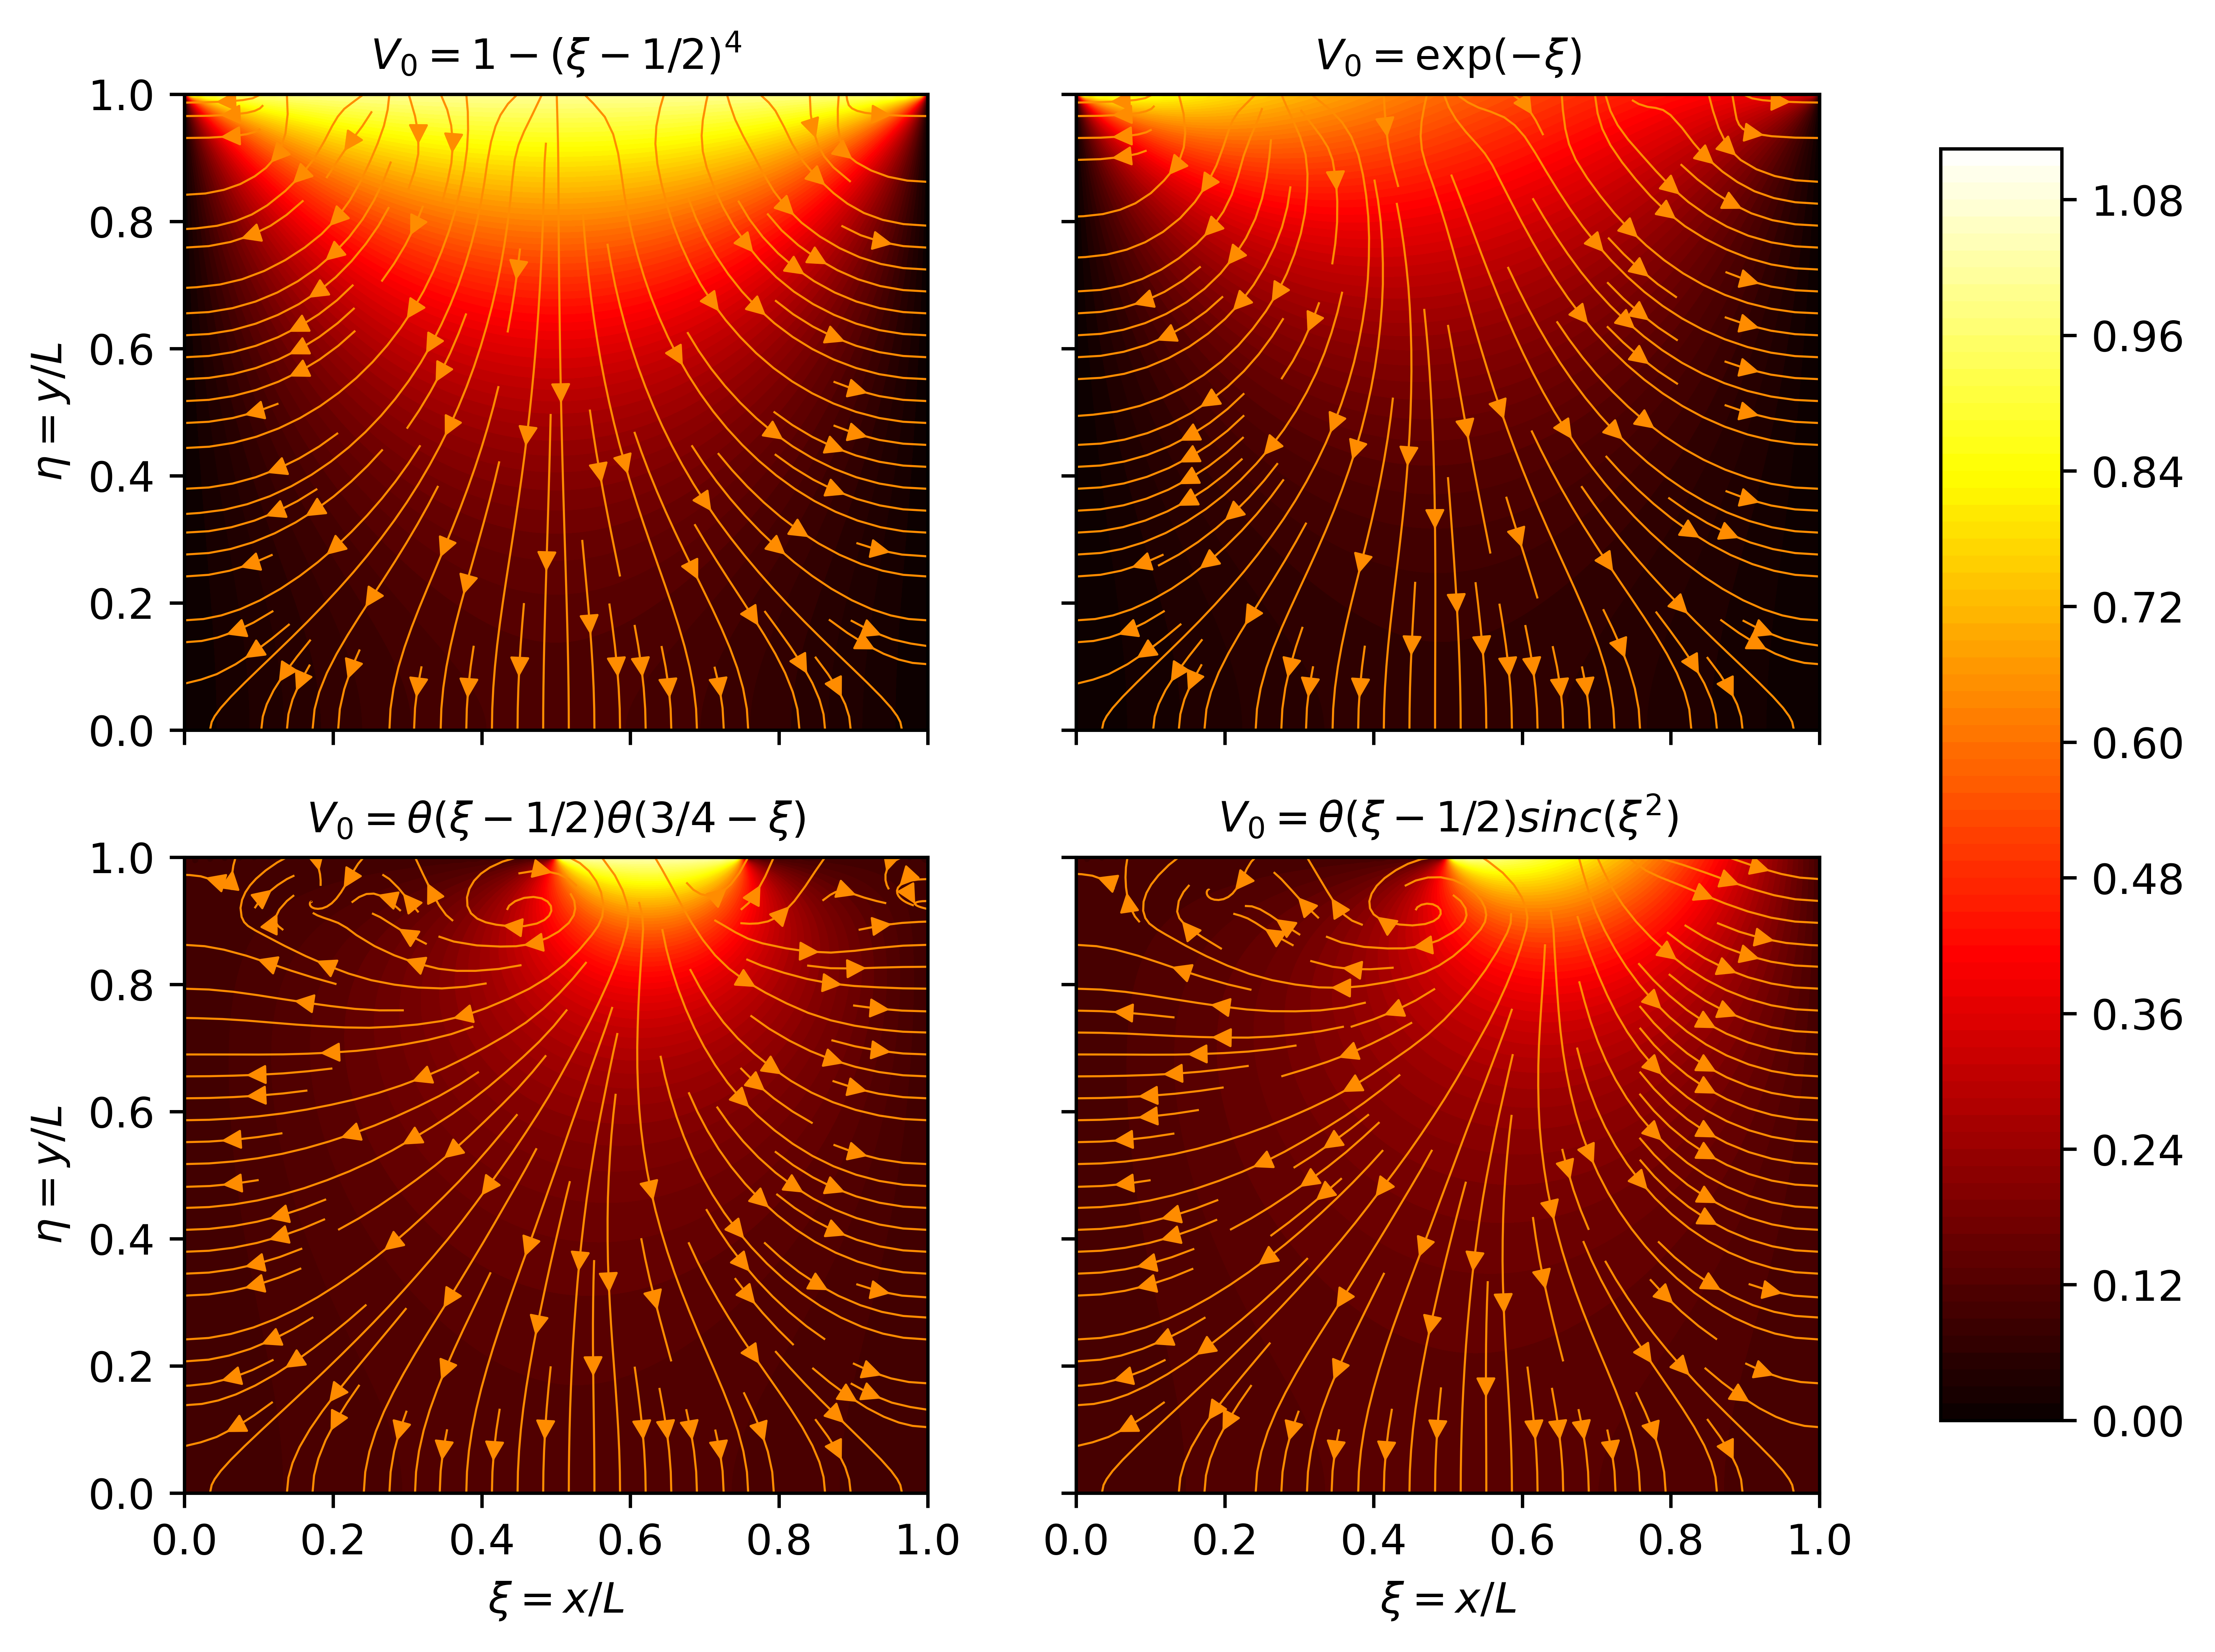

In [ ]:
x = np.linspace(0,1,10)

X2,Y2 =np.meshgrid(x,x)

def E(N, V0, L=1):
    Efield_x = np.zeros_like(X2)
    Efield_y = np.zeros_like(Y2)
    for n in range(1, N+1):
        Cn = cn(V0, n)  # Calculate the Fourier coefficient for each n
        Efield_x += - Cn * n * np.pi * np.sinh(n * np.pi * Y2 / L) * np.cos(n * np.pi * X2 / L)
        Efield_y += - Cn * n * np.pi * np.cosh(n * np.pi * Y2 / L) * np.sin(n * np.pi * X2 / L)
    return Efield_x, Efield_y

E_x, E_y = E(100, V0)
fig, axes = plt.subplots(2, 2, figsize=(8,6), dpi=800, sharex='col', sharey='row')
# Plot for V0
c1 = axes[0, 0].contourf(X, Y, V1, 100, cmap='hot')
axes[0,0].streamplot(X2, Y2, E(100, V0)[0], E(100, V0)[1], color='darkorange', linewidth=0.5)

axes[0, 0].set_title(r'$V_{0} = 1-(\xi-1/2)^4$', size=10)
axes[0, 0].set_ylabel(r'$\eta=y/L$')

# Plot for V0_2
c2 = axes[0, 1].contourf(X, Y, V2, 100, cmap='hot')
axes[0, 1].set_title(r'$V_{0} = \exp(-\xi)$', size=10)
axes[0, 1].streamplot(X2, Y2, E(100, V0_2)[0], E(100, V0_2)[1], color='darkorange', linewidth=0.5)

# Assume V3 is defined
c3 = axes[1, 0].contourf(X, Y, V3, 100, cmap='hot')
axes[1, 0].streamplot(X2, Y2, E(100, V0_3)[0], E(100, V0_3)[1], color='darkorange', linewidth=0.5)
axes[1, 0].set_title(r'$V_{0} = \theta(\xi-1/2)\theta(3/4-\xi)$', size=10)
axes[1, 0].set_xlabel(r'$\xi=x/L$')
axes[1, 0].set_ylabel(r'$\eta=y/L$')

# Assume V4 is defined
c4 = axes[1, 1].contourf(X, Y, V4, 100, cmap='hot')
axes[1, 1].streamplot(X2, Y2, E(100, V0_4)[0], E(100, V0_4)[1], color='darkorange', linewidth=0.5)
axes[1, 1].set_title(r'$V_{0} = \theta(\xi-1/2)sinc(\xi^2)$', size=10)
axes[1, 1].set_xlabel(r'$\xi=x/L$')

# Create an axis on the right side for the colorbar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(c1, cax=cbar_ax)

plt.show()